### Building Machine Learning Models
Now we will train several Machine Learning models and compare their results.

In [1]:
# Import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

In [2]:
# Read data
df = pd.read_csv('../data/train.csv', index_col=0)

In [3]:
# Import the preprocessed dataset from util
from ipynb.fs.full.utils import preprocess
df = preprocess(df)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_size,Embarked_1,...,Fare_3,Fare_4,Fare_5,Pclass_1,Pclass_2,Pclass_3,fam_size_1,fam_size_2,fam_size_3,fam_size_4
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,1,1,0,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,1,0,2,1,0,4,0,2,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,0,1,0,0,0,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1,1,0,2,1,0,4,2,2,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0,3,1,2,0,0,1,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [5]:
dfm = df.drop(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'fam_size'], axis=1)
dfm.head(2)

,Survived,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,Age_1,Age_2,Age_3,Age_4,...,Fare_3,Fare_4,Fare_5,Pclass_1,Pclass_2,Pclass_3,fam_size_1,fam_size_2,fam_size_3,fam_size_4
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
#Split dataset so that we can train the model with the training set and test the predictive power with the test dataset
X = dfm.drop("Survived", axis=1)
y = dfm["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Normalize the training variables using Standard Scaling to bring all of them to the same level of magnitude.
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [7]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((223, 22), (668, 22), (223,), (668,))

In [8]:
#Create a function within many Machine Learning Models
#source : https://medium.com/better-programming/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16

def models(X_train,y_train):
          
#Logistic Regression
    logreg = LogisticRegression(random_state =42)
    logreg.fit(X_train, y_train)

#Decision Tree Classifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
    tree.fit(X_train, y_train)
    
#Random Forest Classifier
    RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
    RF.fit(X_train, y_train)
    
#Stochastic Gradient Descent (SGD)
    sgd = linear_model.SGDClassifier(max_iter=5, random_state=42, tol=None)
    sgd.fit(X_train, y_train)
    
#K Nearest Neighbor
    knn = KNeighborsClassifier(n_neighbors = 3) 
    knn.fit(X_train, y_train)
    
#Gaussian Naive Bayes:
    gaussian = GaussianNB() 
    gaussian.fit(X_train, y_train)
    
#Perceptron
    perceptron = Perceptron(max_iter=5, random_state=42)
    perceptron.fit(X_train, y_train)

#Linear Support Vector Machine
    linear_svc = LinearSVC(random_state=42)
    linear_svc.fit(X_train, y_train)
    
    results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Decent', 
                'KNN', 'Naive Bayes', 'Perceptron', 'Support Vector Machines'],
    'Train_Score': [round(logreg.score(X_train, y_train) * 100, 2), round(tree.score(X_train, y_train) * 100, 2), 
              round(RF.score(X_train, y_train) * 100, 2), round(sgd.score(X_train, y_train) * 100, 2),
            round(knn.score(X_train, y_train) * 100, 2), round(gaussian.score(X_train, y_train) * 100, 2), 
            round(perceptron.score(X_train, y_train) * 100, 2), round(linear_svc.score(X_train, y_train) * 100, 2)],
    'Test_Score': [round(logreg.score(X_test, y_test) * 100, 2), round(tree.score(X_test, y_test) * 100, 2), 
              round(RF.score(X_test, y_test) * 100, 2), round(sgd.score(X_test, y_test) * 100, 2),
            round(knn.score(X_test, y_test) * 100, 2), round(gaussian.score(X_test, y_test) * 100, 2), 
            round(perceptron.score(X_test, y_test) * 100, 2), round(linear_svc.score(X_test, y_test) * 100, 2)]})
            
    result = results.sort_values(by='Train_Score', ascending=False)
    result = result.set_index('Model')
    print(result)
    
    return logreg, tree, RF, sgd, knn, gaussian, perceptron, linear_svc

#Get and train all the models and store them in a variable called model.

model = models(X_train,y_train)

C:\Users\pbamo\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\pbamo\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                            Train_Score  Test_Score
Model                                              
Decision Tree                     88.17       80.27
Random Forest                     88.17       83.41
KNN                               83.98       71.75
Logistic Regression               83.23       81.17
Support Vector Machines           82.34       82.06
Perceptron                        77.54       78.48
Stochastic Gradient Decent        76.65       72.65
Naive Bayes                       76.35       76.23


From the table above, the decision tree and random forest classifier are tied at 88.17% training accuracy, but I am going to adjudge and proceed with the Random Forest Classifier as the best performer because of it higher accuracy on the test data.  

In [9]:
#### Further Evaluation: Confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[118  16]
 [ 26  63]]
Model[0] Testing Accuracy = "0.8116591928251121 !"

[[120  14]
 [ 30  59]]
Model[1] Testing Accuracy = "0.8026905829596412 !"

[[115  19]
 [ 18  71]]
Model[2] Testing Accuracy = "0.8340807174887892 !"

[[100  34]
 [ 27  62]]
Model[3] Testing Accuracy = "0.726457399103139 !"

[[90 44]
 [19 70]]
Model[4] Testing Accuracy = "0.7174887892376681 !"

[[106  28]
 [ 25  64]]
Model[5] Testing Accuracy = "0.7623318385650224 !"

[[107  27]
 [ 21  68]]
Model[6] Testing Accuracy = "0.7847533632286996 !"

[[120  14]
 [ 26  63]]
Model[7] Testing Accuracy = "0.820627802690583 !"



In [10]:
dfm.columns.values

array(['Survived', 'Embarked_1', 'Embarked_2', 'Embarked_3', 'Sex_1',
       'Sex_2', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Fare_1',
       'Fare_2', 'Fare_3', 'Fare_4', 'Fare_5', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'fam_size_1', 'fam_size_2', 'fam_size_3', 'fam_size_4'],
      dtype=object)

#### Predict your survival using the Models

In [11]:
your_data = [[1,0,0,0, 1, 0, 1, 1, 0, 0, 1,0,0,0,1, 1,0,0,1,0,0,0]]

for i in range(len(model)):
    test = model[i].predict(your_data)
    if test == 0:
      print('Oh no!', model[i], 'predicted that you will not make it')
    else:
      print('\033[1m' + '\033[94m' + 'Nice!', model[i], 'predicted that you will survive' + '\033[0m')

Oh no! LogisticRegression(random_state=42) predicted that you will not make it
Oh no! DecisionTreeClassifier(criterion='entropy', random_state=42) predicted that you will not make it
Oh no! RandomForestClassifier(criterion='entropy', random_state=42) predicted that you will not make it
Oh no! SGDClassifier(max_iter=5, random_state=42, tol=None) predicted that you will not make it
Oh no! KNeighborsClassifier(n_neighbors=3) predicted that you will not make it
Oh no! GaussianNB() predicted that you will not make it
Oh no! Perceptron(max_iter=5, random_state=42) predicted that you will not make it
Oh no! LinearSVC(random_state=42) predicted that you will not make it


As per the input data, none of the models predicted a survival, in some instances, the SGD Classifier did though, we are however going to proceed with the Random Forest classifier to see if we can improve the accuracy through tuning the hyperparameters, dropping some least important features, etc.

#### Hyperparameter Optimization for Random Forest

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Find the best parameters for the model
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

#initiate model
RF = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=1, n_jobs=-1)
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 700}

In [18]:
#Retrain Random Forest with the new parameters
Random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 16,   
                                       n_estimators=700)

Random_forest.fit(X_train, y_train)
y_pred = Random_forest.predict(X_test)

accuracy = Random_forest.score(X_train, y_train)

print("accuracy score:", round(accuracy, 4)*100, "%")

accuracy score: 85.18 %


Suprisingly, after tuning the hyperparameters, we get a reduction in the accuracy by ca. 3%, so the next step generally will be to select more parameters for optimization, which normally takes a lot of time, or possibly try another optimization technique, like RandomizedSearchCV, but we will leave that for now and check further methods of evaluating the model's performance.

#### Further Evaluation:

In [41]:
# i. Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(Random_forest, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_pred)
cm

array([[381,  34],
       [ 80, 173]], dtype=int64)

<AxesSubplot:>

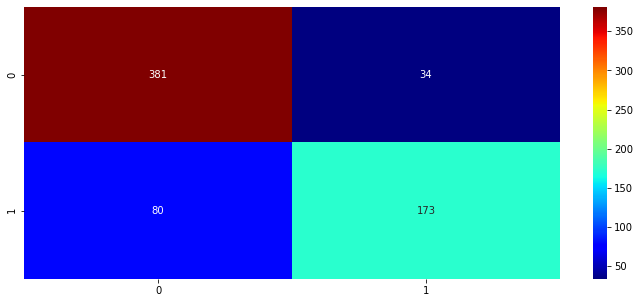

In [42]:
sns.heatmap(cm,annot=True,fmt='.0f',cmap='jet')
plt.savefig('../Images/Confusion Matrix Random Forest',dpi=150)

From the confusion matrix, the true negatives was 381, which means 381 passengers were correctly predicted as did not survive while 34 false negatives were detected. On the 2nd row, 80 false positives were detected, while 173 true positives representing correct prediction of passengers who survived were detected.

In [43]:
# ii. Precision and Recall
print("Precision:", precision_score(y_train, y_pred))
print("Recall:",recall_score(y_train, y_pred))

Precision: 0.8357487922705314
Recall: 0.6837944664031621


The **precision** tells us that our model predicts 73% of the time, a passenger's survival correctly while the **recall** tells us that it predicted the survival of 68% of the people who actually survived.

### Summary
We started with data exploration, cleaning, feature modification and creation and made predictions using 8 models from which we proceeded with the random forest classifier as the best based on the accuracy. We further proceeded to tune the hyperparameters of our chosen model after which we looked at some further methods of evaluating the model's performance. The results looked promising but of course there is still room for improvement, like doing a more extensive hyperparameter optimization on several models, identifying and removing less important features which create unnecessary noise that interferes with our algorithm.